In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "Times"
})

from scipy.linalg import eigh, norm

# Impurities in a sawtooth lattice

In this notebook, we diagonalize the real-space hamiltonian of the sawtooth model with an impurity in the middle.

In [2]:
N = 200 #number of primitive cells
n = 2*N #number of points

# On-site energies
eps_a = eps_b = 0.

# Hopping terms
t_aa = 0. 
t_ab = np.sqrt(2)
t_bb = 1.

# A-site impurity

Here, we construct the real-space Hamiltonian under periodic boundary conditions. We add an impurity on an A-site.

In [294]:
eps_vac = 4.

In [295]:
H = np.diag([eps_b/2,eps_a/2]*N)
H += np.diag([-t_ab]*(n-1),k=1)
H += np.diag([-t_bb,-t_aa]*(N-1),k=2)

H[0,n-2] -= t_bb
H[N+1,N+1] = eps_vac/2.

H += np.conjugate(H.transpose())

We diagonalize it. We get two spurious states localized at the "boundaries" of the lattice. After further investigations, this has been attributed to a numerical errors. Those states do not give any effect if the atom is put in the middle of the chain, as they're highly localized. 

In [296]:
eigvals, eigvect = eigh(H)

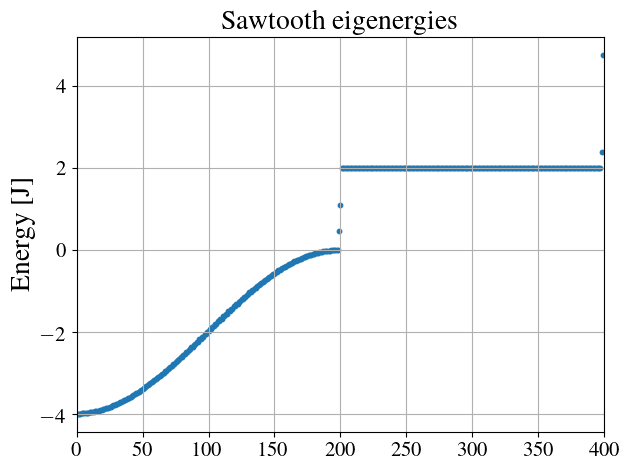

In [297]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("Sawtooth eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigvals))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

Photonic dressed state.

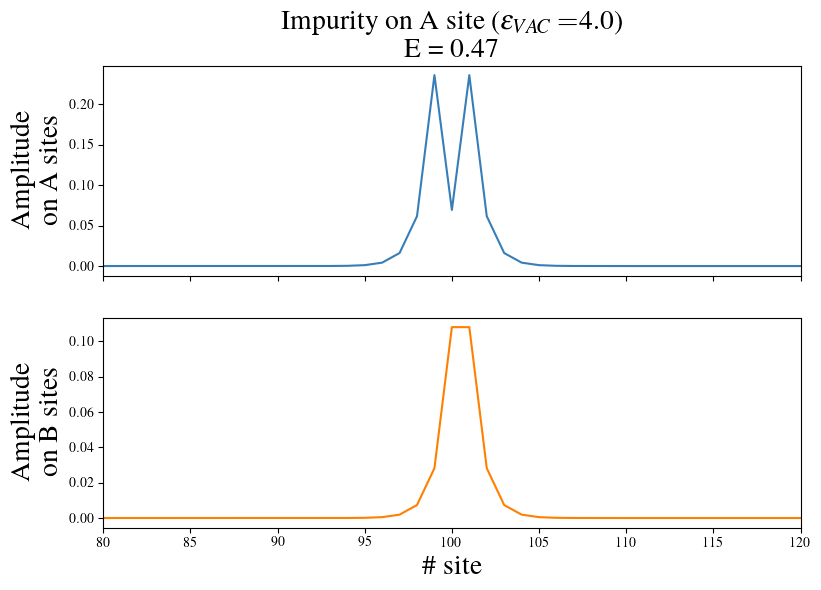

In [298]:
fig, ax = plt.subplots(figsize=(9,6),nrows=2,ncols=1,sharex=True)

s = 199
ax[0].plot(eigvect[1::2,s]**2,color="#377eb8")
ax[1].plot(eigvect[::2,s]**2,color='#ff7f00')

ax[0].set_title("Impurity on A site ($\epsilon_{VAC}=$"+f"{eps_vac:.1f})\n"+f"E = {eigvals[s]:.2f}",fontsize=20)
ax[1].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)

plt.xlim(80,120)
#ax[0].set_ylim(0)
#ax[1].set_ylim(0)

#plt.savefig(f"impurity/impA_{eps_vac*10:.0f}.png")
plt.show()

Highly-localized impurity state.

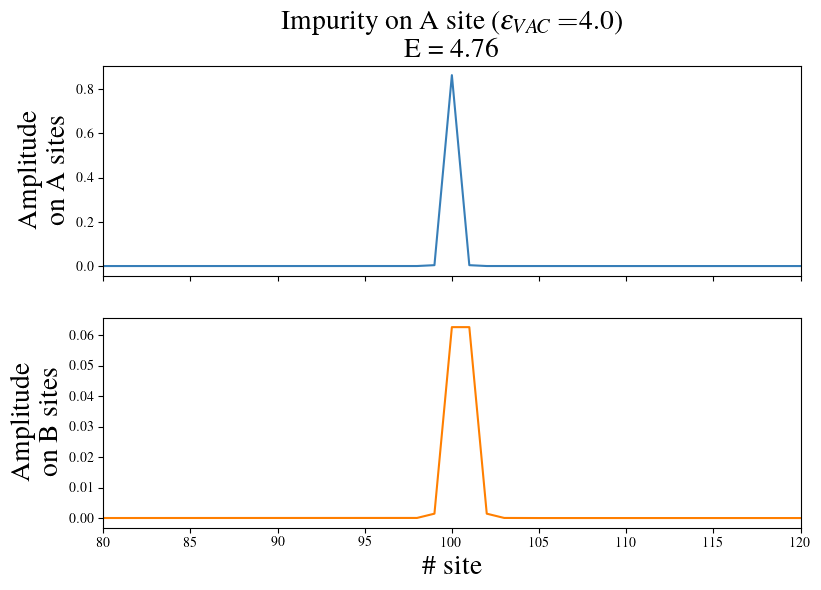

In [299]:
fig, ax = plt.subplots(figsize=(9,6),nrows=2,ncols=1,sharex=True)

s = -1
ax[0].plot(eigvect[1::2,s]**2,color="#377eb8")
ax[1].plot(eigvect[::2,s]**2,color='#ff7f00')

ax[0].set_title("Impurity on A site ($\epsilon_{VAC}=$"+f"{eps_vac:.1f})\n"+f"E = {eigvals[s]:.2f}",fontsize=20)
ax[1].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)

plt.xlim(80,120)
#ax[0].set_ylim(0)
#ax[1].set_ylim(0)

plt.savefig(f"impurity/impA2_{eps_vac*10:.0f}.png")
plt.show()

# B-site impurity

Here, we construct the real-space Hamiltonian under periodic boundary conditions. We add an impurity in an B-site. It seems that no dressed states arise.

In [234]:
eps_vac = -300.

In [235]:
H = np.diag([eps_b/2,eps_a/2]*N)
H += np.diag([-t_ab]*(n-1),k=1)
H += np.diag([-t_bb,-t_aa]*(N-1),k=2)

H[0,n-2] -= t_bb
H[N,N] = eps_vac/2.

H += np.conjugate(H.transpose())

We diagonalize it. We get two spurious states localized at the "boundaries" of the lattice. After further investigations, this has been attributed to a numerical errors. Those states do not give any effect if the atom is put in the middle of the chain, as they're highly localized. 

In [236]:
eigvals, eigvect = eigh(H)

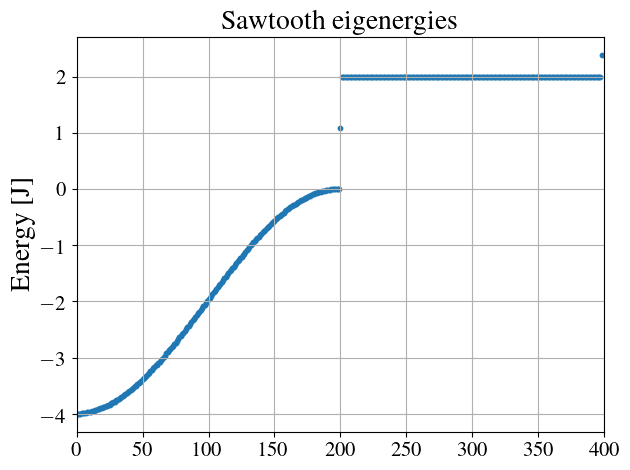

In [244]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals[1:])),eigvals[1:],s=10)

ax.set_title("Sawtooth eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigvals))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

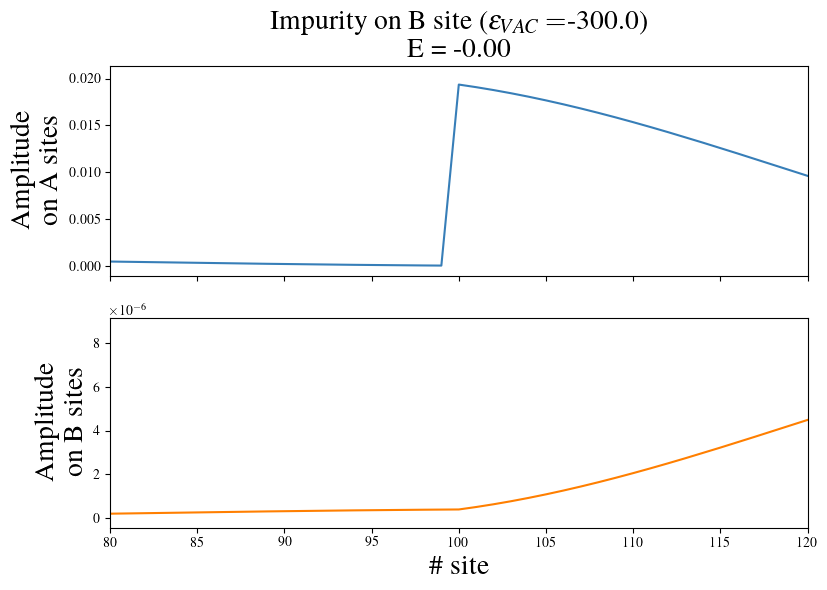

In [246]:
fig, ax = plt.subplots(figsize=(9,6),nrows=2,ncols=1,sharex=True)

s = 198
ax[0].plot(eigvect[1::2,s]**2,color="#377eb8")
ax[1].plot(eigvect[::2,s]**2,color='#ff7f00')

ax[0].set_title("Impurity on B site ($\epsilon_{VAC}=$"+f"{eps_vac:.1f})\n"+f"E = {eigvals[s]:.2f}",fontsize=20)
ax[1].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)

plt.xlim(80,120)
#ax[0].set_ylim(0)
#ax[1].set_ylim(0)

#plt.savefig(f"impurity/impB_{eps_vac*10:.0f}.png")
plt.show()

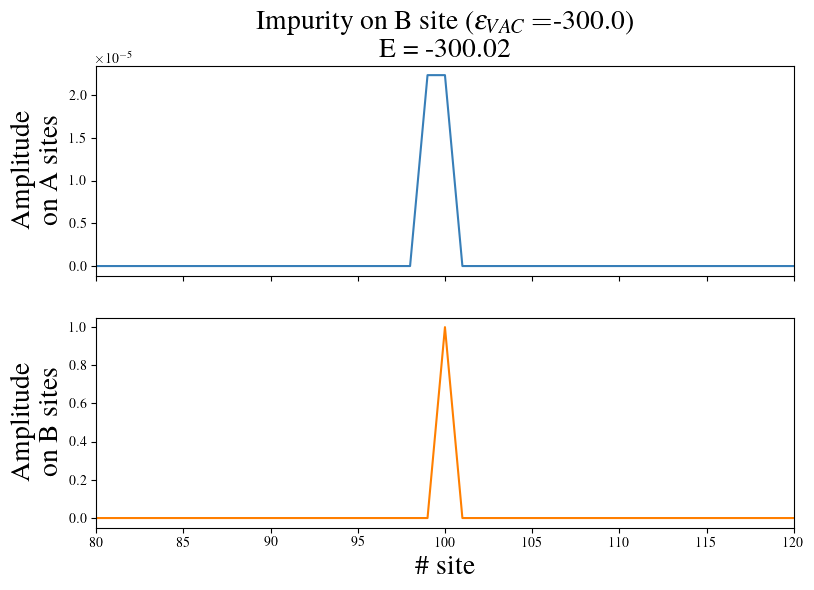

In [247]:
fig, ax = plt.subplots(figsize=(9,6),nrows=2,ncols=1,sharex=True)

s = 0
ax[0].plot(eigvect[1::2,s]**2,color="#377eb8")
ax[1].plot(eigvect[::2,s]**2,color='#ff7f00')

ax[0].set_title("Impurity on B site ($\epsilon_{VAC}=$"+f"{eps_vac:.1f})\n"+f"E = {eigvals[s]:.2f}",fontsize=20)
ax[1].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)

plt.xlim(80,120)
#ax[0].set_ylim(0)
#ax[1].set_ylim(0)

#plt.savefig(f"impurity/impB_{eps_vac*10:.0f}.png")
plt.show()